<a href="https://colab.research.google.com/github/PrzemyslawCiesielski/studia/blob/main/Zad2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Załadowanie zbiorów danych
train_data_url = 'https://raw.githubusercontent.com/PrzemyslawCiesielski/studia/main/train.csv'
test_data_url = 'https://raw.githubusercontent.com/PrzemyslawCiesielski/studia/main/test.csv'
train_data = pd.read_csv(train_data_url)
test_data = pd.read_csv(test_data_url)

In [ ]:
# Sprawdzenie kilku pierwszych wierszy danych treningowych
train_data.head()

,x1,x2,t
0,3.171839,-4.812466,1.0
1,5.514214,6.434071,1.0
2,-7.324607,5.894384,0.0
3,4.521634,1.290592,1.0
4,5.772033,5.687362,1.0


In [ ]:
# Sprawdzenie kilku pierwszych wierszy danych testowych
test_data.head()

,x1,x2,t
0,4.382208,2.596173,1.0
1,10.986137,6.937835,1.0
2,-0.322613,6.855542,0.0
3,3.721685,-2.674775,1.0
4,7.202008,0.948736,1.0


In [ ]:
# Przygotowanie danych
X_train = train_data[['x1', 'x2']]
y_train = train_data['t']

# Wytrenowanie modelu regresji logistycznej
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Przygotowanie danych
X_test = test_data[['x1', 'x2']]
y_test = test_data['t']

# Przewidywanie etykiet dla zestawu testowego
y_pred = log_reg.predict(X_test)

# Obliczenie macierzy pomyłek
confusion_matrix(y_test, y_pred)

array([[96,  2],
       [ 5, 97]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


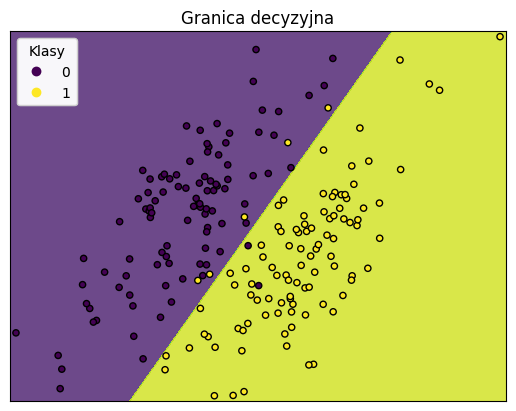

In [ ]:
# Funkcja do wykreślania granicy decyzyjnej
def plot_decision_boundary(X, y, model, ax):
    h = .02  # Rozmiar kroku w siatce
    # Tworzenie siatki do narysowania na niej wykresu
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.8)
    scatter = ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolor='k', s=20)
    legend1 = ax.legend(*scatter.legend_elements(), loc="upper left", title="Klasy")
    ax.add_artist(legend1)
    ax.set_xlim(X.iloc[:, 0].min() - 0.5, X.iloc[:, 0].max() + 0.5)
    ax.set_ylim(X.iloc[:, 1].min() - 0.5, X.iloc[:, 1].max() + 0.5)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title('Granica decyzyjna')

# Wykres granicy decyzyjnej
fig, ax = plt.subplots()
plot_decision_boundary(X_test, y_test, log_reg, ax)
plt.show()

# New Section